In [51]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_curve, roc_auc_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
data = load_breast_cancer()
input = pd.DataFrame(data.data, columns = data.feature_names)
target = data.target

# input = pd.read_csv('', encoding='CP949')
# target = pd.read_csv('', encoding='CP949)

In [61]:
x_train, x_test, y_train, y_test = train_test_split(input, target, random_state=42, test_size=0.2)

standard = StandardScaler()
x_train = standard.fit_transform(x_train)
x_test = standard.fit_transform(x_test)

In [66]:
lgm = LogisticRegression(random_state=42)
lgm.fit(x_train, y_train)
test_prediction = lgm.predict(x_test)
test_accuracy = accuracy_score(test_prediction, y_test)
test_precision = precision_score(test_prediction, y_test)
test_recall = recall_score(test_prediction, y_test)
roc_auc = roc_auc_score(test_prediction, y_test)
f1 = f1_score(test_prediction, y_test)

print(f'model : RandomForest\naccuracy : {test_accuracy}\nprecision_score : {test_precision}\nrecall_score : {test_recall}\nroc_score : {roc_auc}\nf1_score : {f1}')

model : RandomForest
accuracy : 0.9824561403508771
precision_score : 1.0
recall_score : 0.9726027397260274
roc_score : 0.9863013698630136
f1_score : 0.9861111111111112


In [ ]:
## classification, confusion_matrix, roc_curve 출처
## https://datascienceschool.net/03%20machine%20learning/09.04%20%EB%B6%84%EB%A5%98%20%EC%84%B1%EB%8A%A5%ED%8F%89%EA%B0%80.html

In [56]:
## 사이킷런 패키지의 metrics 패키지에서는 정밀도, 재현율, F1점수를 구하는 classification_report 명령을 제공
print(classification_report(y_test, test_prediction, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       1.00      0.95      0.98        43
     class 1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



c:\프로그램\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.draw()
c:\프로그램\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  fig.canvas.draw()
c:\프로그램\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  fig.canvas.draw()
c:\프로그램\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.draw()
c:\프로그램\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  fig.canvas.draw()


<AxesSubplot:>

c:\프로그램\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\프로그램\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\프로그램\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\프로그램\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\프로그램\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


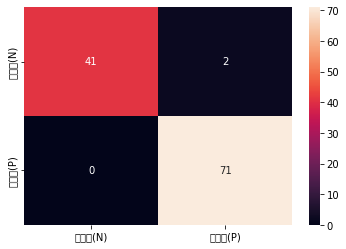

In [63]:
cm = pd.DataFrame(confusion_matrix(y_test, test_prediction), columns = ['예측값(N)', '예측값(P)'], index=['실제값(N)', '실제값(P)'])
plt.rcParams['font.family'] = 'NanumGothic'
sns.heatmap(cm, annot=True)

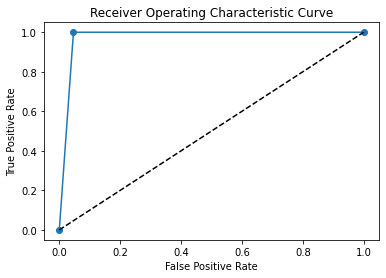

In [64]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, test_prediction)

plt.plot(fpr, tpr, 'o-', label="Logistic Regression")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.show()